In [1]:
import numpy as np
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting

# from pandas_datareader import data

from sklearn.ensemble import GradientBoostingRegressor 
import datetime as dt
import urllib.request, json

import seaborn as sns
  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from numpy import sqrt

C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
os.chdir(r"F:\uOttawa Winter 20\Data Mining\Project")
data = pd.read_csv("dow_jones_index.data")
# mainFrame = data

In [3]:
os.chdir(r"F:\uOttawa Winter 20\Data Mining\Project")
data = pd.read_csv("dow_jones_index.data")

In [3]:
data.head()
data = data.dropna()
data.isnull().sum()

quarter                               0
stock                                 0
date                                  0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
percent_change_next_weeks_price       0
days_to_next_dividend                 0
percent_return_next_dividend          0
dtype: int64

In [5]:
# data['price'] = np.where(data['percent_change_next_weeks_price']>0, '1', '0')

In [5]:
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712


In [6]:
data.shape

(720, 16)

In [7]:
data.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

In [8]:
cols = ["open","close","high","low","volume","percent_change_price","percent_change_volume_over_last_wk","previous_weeks_volume",
"days_to_next_dividend","percent_return_next_dividend","next_weeks_open","percent_change_next_weeks_price"]

## Data Preprocessing

In [9]:
df = data[cols]


In [10]:
df.head()

,open,close,high,low,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,days_to_next_dividend,percent_return_next_dividend,next_weeks_open,percent_change_next_weeks_price
1,$16.71,$15.97,$16.71,$15.64,242963398,-4.428490,1.380223,239655616.0,19,0.187852,$16.19,-2.470660
2,$16.19,$15.79,$16.38,$15.60,138428495,-2.470660,-43.024959,242963398.0,12,0.189994,$15.87,1.638310
3,$15.87,$16.13,$16.63,$15.82,151379173,1.638310,9.355500,138428495.0,5,0.185989,$16.18,5.933250
4,$16.18,$17.14,$17.39,$16.18,154387761,5.933250,1.987452,151379173.0,97,0.175029,$17.33,0.230814
5,$17.33,$17.37,$17.48,$16.97,114691279,0.230814,-25.712195,154387761.0,90,0.172712,$17.39,-0.632547


In [11]:
df.shape

(720, 12)

In [13]:
df['open'] = df.open.str.replace('$' , '')
df['close'] = df.close.str.replace('$' , '')
df['low'] = df.low.str.replace('$' , '')
df['high'] = df.high.str.replace('$' , '')
df['next_weeks_open'] = df.next_weeks_open.str.replace('$' , '')

data['open'] = data.open.str.replace('$' , '')
data['close'] = data.close.str.replace('$' , '')
data['low'] = data.low.str.replace('$' , '')
data['high'] = data.high.str.replace('$' , '')
data['next_weeks_open'] = data.next_weeks_open.str.replace('$' , '')
data['next_weeks_close'] = data.next_weeks_close.str.replace('$' , '')


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [14]:
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712


In [15]:
df.head()

,open,close,high,low,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,days_to_next_dividend,percent_return_next_dividend,next_weeks_open,percent_change_next_weeks_price
1,16.71,15.97,16.71,15.64,242963398,-4.428490,1.380223,239655616.0,19,0.187852,16.19,-2.470660
2,16.19,15.79,16.38,15.60,138428495,-2.470660,-43.024959,242963398.0,12,0.189994,15.87,1.638310
3,15.87,16.13,16.63,15.82,151379173,1.638310,9.355500,138428495.0,5,0.185989,16.18,5.933250
4,16.18,17.14,17.39,16.18,154387761,5.933250,1.987452,151379173.0,97,0.175029,17.33,0.230814
5,17.33,17.37,17.48,16.97,114691279,0.230814,-25.712195,154387761.0,90,0.172712,17.39,-0.632547


In [16]:
# Convert to numeric values
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.info

data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.info




C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<bound method DataFrame.info of      quarter stock       date   open   high    low  close     volume  \
1          1    AA  1/14/2011  16.71  16.71  15.64  15.97  242963398   
2          1    AA  1/21/2011  16.19  16.38  15.60  15.79  138428495   
3          1    AA  1/28/2011  15.87  16.63  15.82  16.13  151379173   
4          1    AA   2/4/2011  16.18  17.39  16.18  17.14  154387761   
5          1    AA  2/11/2011  17.33  17.48  16.97  17.37  114691279   
..       ...   ...        ...    ...    ...    ...    ...        ...   
745        2   XOM  5/27/2011  80.22  82.63  80.07  82.63   68230855   
746        2   XOM   6/3/2011  83.28  83.75  80.18  81.18   78616295   
747        2   XOM  6/10/2011  80.93  81.87  79.72  79.78   92380844   
748        2   XOM  6/17/2011  80.00  80.82  78.33  79.02  100521400   
749        2   XOM  6/24/2011  78.65  81.12  76.78  76.78  118679791   

     percent_change_price  percent_change_volume_over_last_wk  \
1               -4.428490             

In [17]:
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712


In [18]:
mainFrame = data

In [19]:
mainFrame["change"] = mainFrame["close"] - mainFrame["open"]
df_interest = mainFrame[["stock", "date", "open", "close", "change", "volume"]]
df_interest["date"] = pd.to_datetime(df_interest["date"])
df_interest.head()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,stock,date,open,close,change,volume
1,AA,2011-01-14,16.71,15.97,-0.74,242963398
2,AA,2011-01-21,16.19,15.79,-0.40,138428495
3,AA,2011-01-28,15.87,16.13,0.26,151379173
4,AA,2011-02-04,16.18,17.14,0.96,154387761
5,AA,2011-02-11,17.33,17.37,0.04,114691279


In [20]:
df_interest

,stock,date,open,close,change,volume
1,AA,2011-01-14,16.71,15.97,-0.74,242963398
2,AA,2011-01-21,16.19,15.79,-0.40,138428495
3,AA,2011-01-28,15.87,16.13,0.26,151379173
4,AA,2011-02-04,16.18,17.14,0.96,154387761
5,AA,2011-02-11,17.33,17.37,0.04,114691279
...,...,...,...,...,...,...
745,XOM,2011-05-27,80.22,82.63,2.41,68230855
746,XOM,2011-06-03,83.28,81.18,-2.10,78616295
747,XOM,2011-06-10,80.93,79.78,-1.15,92380844
748,XOM,2011-06-17,80.00,79.02,-0.98,100521400


In [21]:
# Wide long -- PIVOT
symbolCloseWide = mainFrame.pivot(index='stock', 
                                  columns='date', 
                                  values='close')
symbolCloseWide.head()

date,1/14/2011,1/21/2011,1/28/2011,2/11/2011,2/18/2011,2/25/2011,2/4/2011,3/11/2011,3/18/2011,3/25/2011,...,4/29/2011,4/8/2011,5/13/2011,5/20/2011,5/27/2011,5/6/2011,6/10/2011,6/17/2011,6/24/2011,6/3/2011
stock,,,,,,,,,,,,,,,,,,,,,
AA,15.97,15.79,16.13,17.37,17.28,16.68,17.14,16.03,16.11,17.09,...,17.00,17.92,17.10,16.26,16.48,17.15,15.28,14.72,15.23,15.92
AXP,46.25,46.00,43.86,46.75,45.53,43.53,43.82,44.28,44.17,45.59,...,49.08,46.28,49.49,51.19,51.13,50.20,47.74,48.50,48.34,49.28
BA,70.07,71.68,69.23,72.14,73.04,72.30,71.38,71.64,69.10,73.34,...,79.78,73.47,79.03,77.52,76.99,79.31,72.69,74.16,71.26,74.84
BAC,15.25,14.25,13.60,14.77,14.75,14.20,14.29,14.38,14.04,13.34,...,12.28,13.48,11.93,11.58,11.69,12.31,10.80,10.68,10.52,11.28
CAT,94.01,92.75,95.68,103.54,105.86,102.00,99.59,100.02,105.06,109.09,...,115.41,109.82,106.33,104.33,104.60,110.34,96.79,95.95,100.01,101.10


## Exploratory Analysis

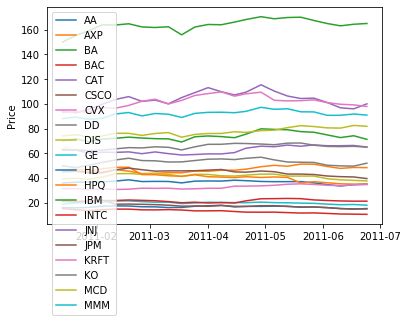

In [23]:
symbols = df_interest["stock"].unique().tolist()
for u in symbols[:20]:
    dates = df_interest[(df_interest["stock"] == u)]["date"]
    values = df_interest[(df_interest["stock"] == u)]["close"]
    plt.plot(dates, values)
plt.legend(symbols, loc='upper left')
plt.ylabel("Price")
plt.show()

In [24]:
latest_year = max(pd.unique(list(df_interest["date"].apply(lambda x:x.year))))
latest_year_mask = [i==latest_year for i in df_interest["date"].apply(lambda x:x.year)]
df_masked1 = df_interest[latest_year_mask]
df_masked1.head()

,stock,date,open,close,change,volume
1,AA,2011-01-14,16.71,15.97,-0.74,242963398
2,AA,2011-01-21,16.19,15.79,-0.40,138428495
3,AA,2011-01-28,15.87,16.13,0.26,151379173
4,AA,2011-02-04,16.18,17.14,0.96,154387761
5,AA,2011-02-11,17.33,17.37,0.04,114691279


In [25]:
symbols = df_interest["stock"].unique().tolist()
maxPerSymbol={}
for u in symbols:
    values = df_interest[(df_interest["stock"] == u)]["close"].tolist()
    maxPerSymbol[u] = max(values)

top10Closers = list(dict(sorted(maxPerSymbol.items(), 
                   key=lambda v:v[1], #sort by key -> v[0] | sort by value->v[1]
                   reverse=True)[:10]).keys())

top_10_mask = [i in top10Closers for i in df_masked1["stock"].tolist()]
df_masked2 = df_masked1[top_10_mask]
df_masked2.head()

,stock,date,open,close,change,volume
25,BA,2011-01-14,69.42,70.07,0.65,18834664
26,BA,2011-01-21,70.86,71.68,0.82,29594221
27,BA,2011-01-28,71.52,69.23,-2.29,34929673
28,BA,2011-02-04,69.26,71.38,2.12,22770062
29,BA,2011-02-11,71.43,72.14,0.71,21809411


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykerne

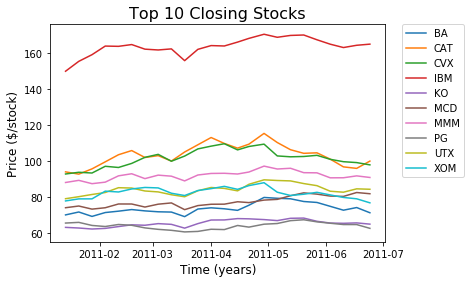

In [26]:
symbols = df_masked2["stock"].unique().tolist()
for u in symbols[:10]:
    dates = df_masked2[(df_interest["stock"] == u)]["date"]
    values = df_masked2[(df_interest["stock"] == u)]["close"]
    plt.plot(dates, values)
#plt.legend(symbols, loc='upper left')
plt.legend(symbols, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(r'Top 10 Closing Stocks', fontsize=16)

plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Price ($/stock)', fontsize=12)
plt.show()

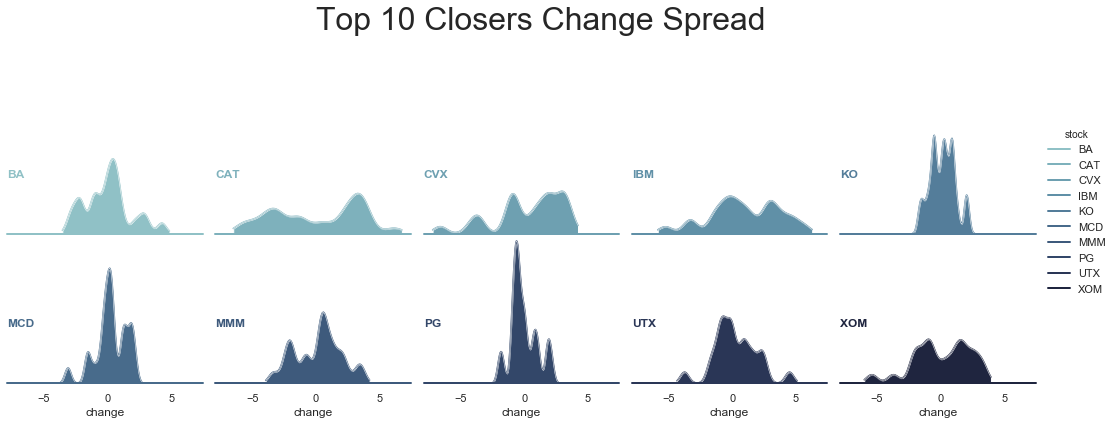

In [27]:
def build_density_facetwrap(somedf, colName, valName, wrapAmount, yourTitle):
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(somedf,col=colName, hue=colName, col_wrap=wrapAmount, palette=pal)
    # Draw the densities in a few steps
    g.map(sns.kdeplot, valName, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, valName, clip_on=False, color="w", lw=0.5, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .4, label, fontweight="bold", color=color, 
                ha="left", va="center", transform=ax.transAxes)
        plt.xlabel('Change ($/day)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

    g.map(label, "change")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=0)

    # Remove axes details that don't play will with overlap


    g.set_titles("")
    g.fig.suptitle(yourTitle, fontsize=32)
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    g.fig.subplots_adjust(top=.8)
    g.add_legend()

build_density_facetwrap(df_masked2,
                       "stock",
                        "change",
                        5,
                        "Top 10 Closers Change Spread"
                       )


In [28]:
df_masked2["date"] = pd.to_datetime(df_masked2["date"])
months = list(df_masked2["date"].apply(lambda x:x.month).unique())
df_masked2["month"] = df_masked2["date"].apply(lambda x: x.month)


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
from __future__ import division

# Get each symbols standard deviation in time
ss = df_interest.groupby(by=["stock"])["change"].std()

# Count each symbol groups positive day change in time
## NOTE: it is a proportion to account for some days not appearing for some symbols in time
pcs = df_interest.groupby(by='stock').apply(lambda grp: grp[grp['change'] > 0]['change'].count() / grp['change'].size)

avgv = df_interest.groupby(by=['stock'])['volume'].mean()/10000000

newdf = pd.concat([ss, pcs, avgv], axis=1).reset_index()
newdf.columns = ['stock', 'std', 'prop_pos_day_change', "avg_volume"]
newdf.head()

,stock,std,prop_pos_day_change,avg_volume
0,AA,0.595516,0.458333,12.505478
1,AXP,1.258075,0.500000,3.479625
2,BA,1.825937,0.541667,2.326156
3,BAC,0.438227,0.250000,69.256416
4,CAT,3.520371,0.541667,3.413092


In [30]:
from sklearn.cluster import KMeans

# Visualize K = {3..9}
kValues = [i for i in range(3,10)]
for k in kValues:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(newdf[['std','prop_pos_day_change']])
    newdf[str(k)] = kmeans.labels_
    print("Finished k=", k)

newdf = pd.melt(newdf, 
                id_vars=["stock", 'std', 'prop_pos_day_change'],
                var_name="k", 
                value_name="values",
                value_vars=list(newdf.columns[-7:]))

newdf.head()

Finished k= 3
Finished k= 4
Finished k= 5
Finished k= 6
Finished k= 7
Finished k= 8
Finished k= 9


,stock,std,prop_pos_day_change,k,values
0,AA,0.595516,0.458333,3,1
1,AXP,1.258075,0.500000,3,0
2,BA,1.825937,0.541667,3,0
3,BAC,0.438227,0.250000,3,1
4,CAT,3.520371,0.541667,3,2


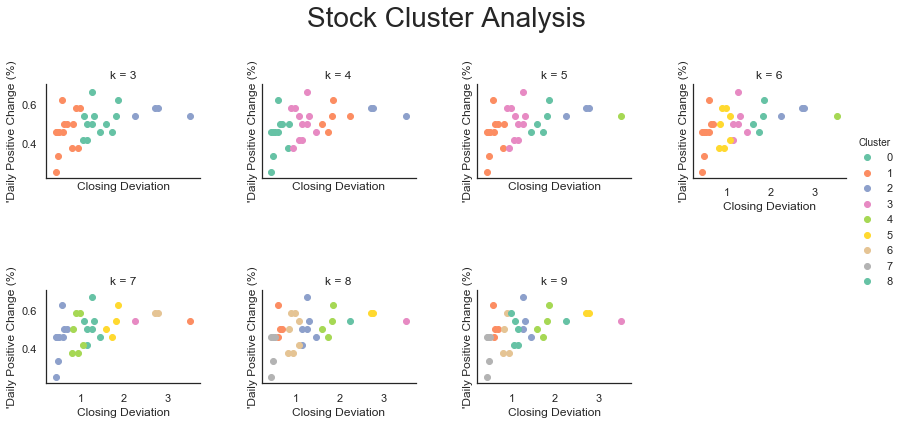

In [31]:
g = sns.FacetGrid(newdf, col="k", hue="values", col_wrap=4, palette='Set2')
g = g.map(plt.scatter, "std", "prop_pos_day_change")
g.set(xlabel="Closing Deviation")
g.set(ylabel="'Daily Positive Change (%)")
g.fig.suptitle("Stock Cluster Analysis", size=28)
g.fig.subplots_adjust(top=.8)
plt.subplots_adjust(hspace=1.2, wspace=0.4)
g.add_legend()
g._legend.set_title("Cluster")
#handles = g._legend_data.values()
#labels = g._legend_data.keys()
#g.fig.legend(handles=handles, labels=labels, loc='lower right', ncol=3)

### Correlation Analysis 

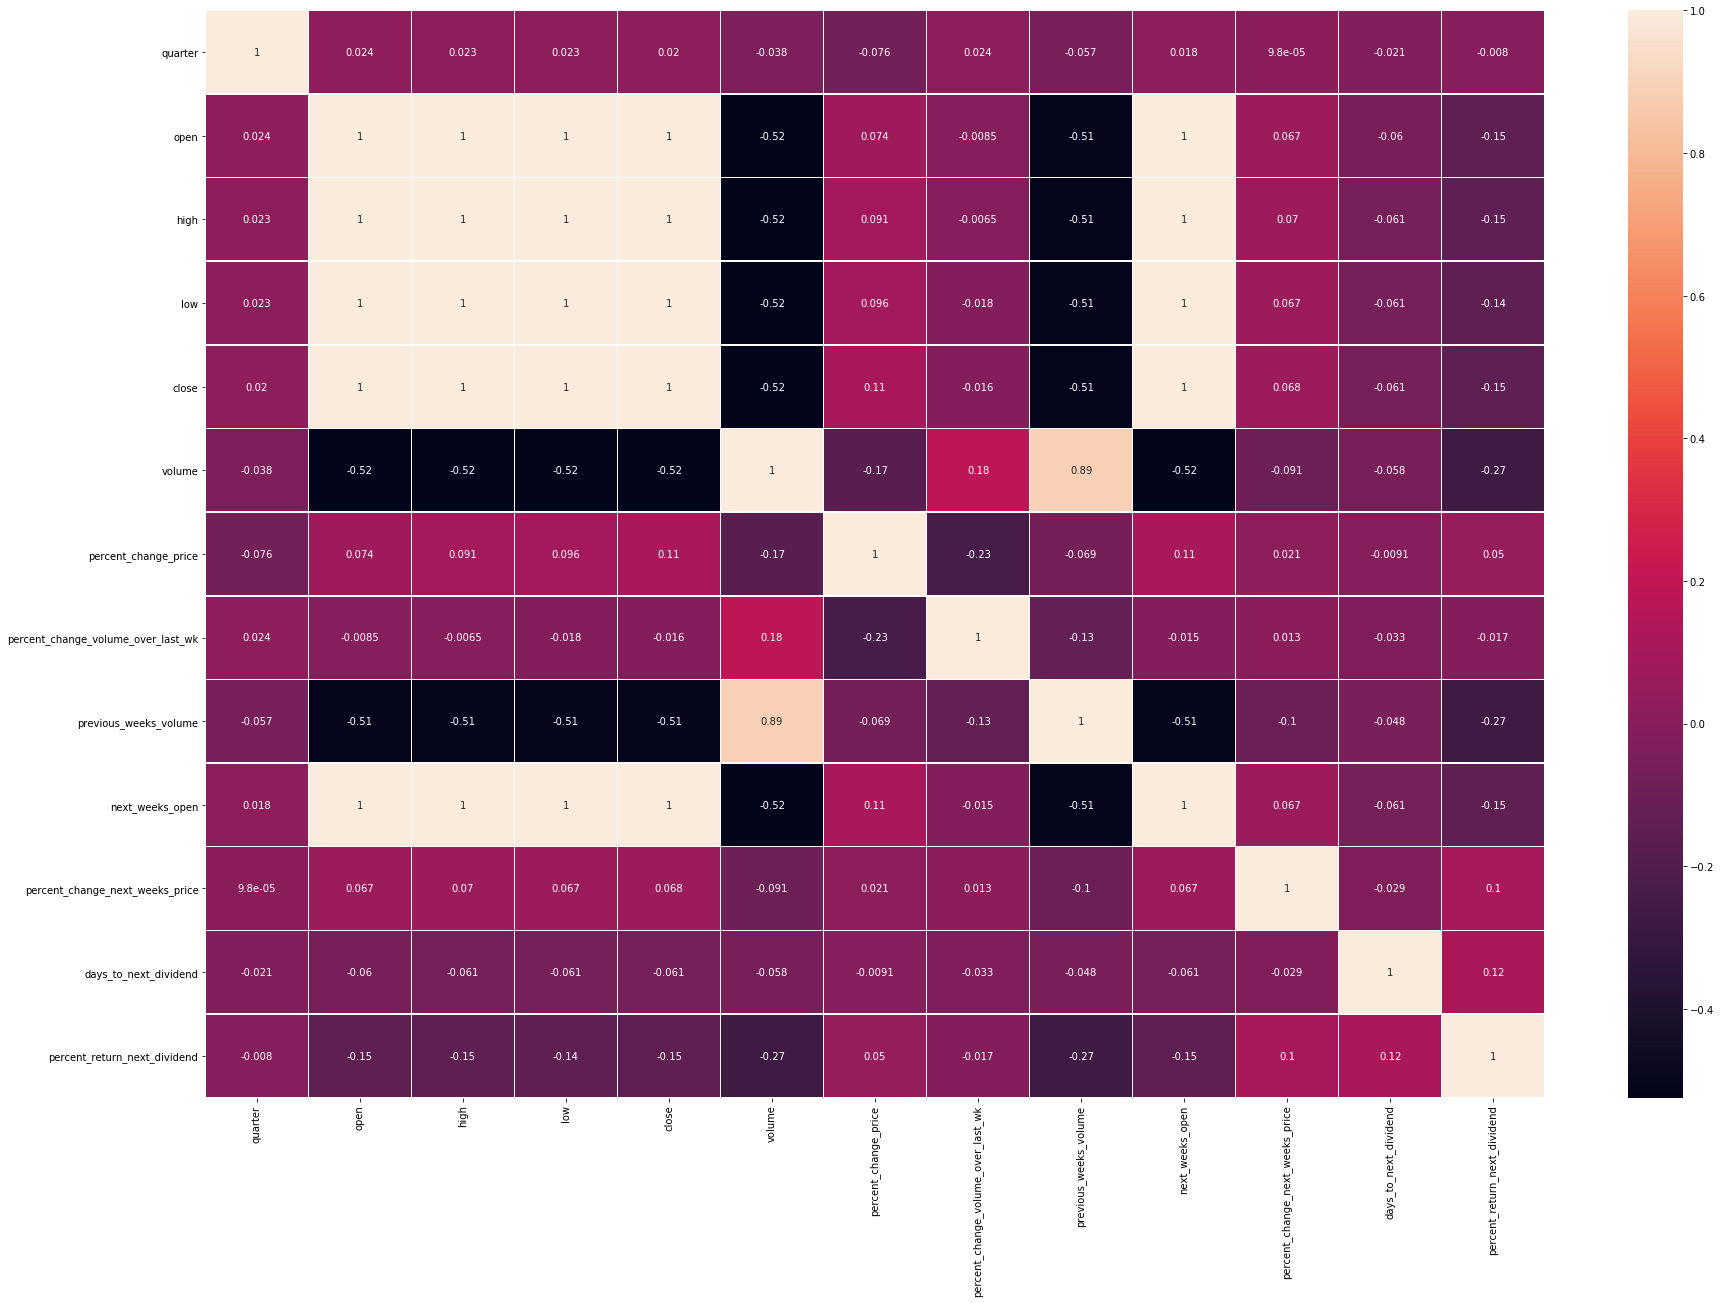

In [19]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(30,20))
# sns.heatmap(df.corr(),annot=True,linewidth=0.5)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,linewidth=0.5)

In [32]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)

['high', 'low', 'close', 'previous_weeks_volume', 'next_weeks_open', 'change']


In [33]:
data_cols = ['volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend']

In [34]:
X = data[data_cols]
y = data["next_weeks_open"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.head())

        volume  percent_change_price  percent_change_volume_over_last_wk  \
119  227819072              0.355691                          -56.232090   
730   42649301              1.364380                           -8.612675   
111  437317986              1.354740                           -2.712025   
529  321390635             -3.522500                           40.252915   
349   74376886              3.607080                          -26.895809   

     percent_change_next_weeks_price  days_to_next_dividend  \
119                         2.675420                     83   
730                        -0.575436                     89   
111                         2.136120                     17   
529                         1.162200                     33   
349                         1.529760                     45   

     percent_return_next_dividend  
119                      0.708861  
730                      0.664034  
111                      0.693069  
529                 

# Model Construction

### 1. Linear Regression



In [35]:
regressor_line = LinearRegression()  
regressor_line.fit(X_train, y_train) #training the algorithm
y_pred_line = regressor_line.predict(X_test)
df_line = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_line.flatten()})
print(df_line.head(5))
mse = mean_squared_error(y_test, y_pred_line)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))

line_score=regressor_line.score(X_test, y_test)
print("Model score (R-squared): %.2f" % line_score)

   Actual  Predicted
0   23.02  12.720977
1   30.67  33.474455
2   19.27   9.696381
3  161.54  71.294379
4  168.50  71.536328
MSE: 905.44
RMSE: 30.09
Model score (R-squared): 0.35


In [36]:
from sklearn.model_selection import cross_val_score
scores_line = cross_val_score(regressor_line, X, y, cv=10) # Ten-fold cross validation.
print(scores_line)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores_line.mean(), scores_line.std() * 2))

[-0.08576448  0.26904859  0.56417244  0.74476628 -0.69013235  0.55892127
  0.27089371  0.41878777  0.70896254  0.61818327]
Accuracy: 0.34 (+/- 0.83)


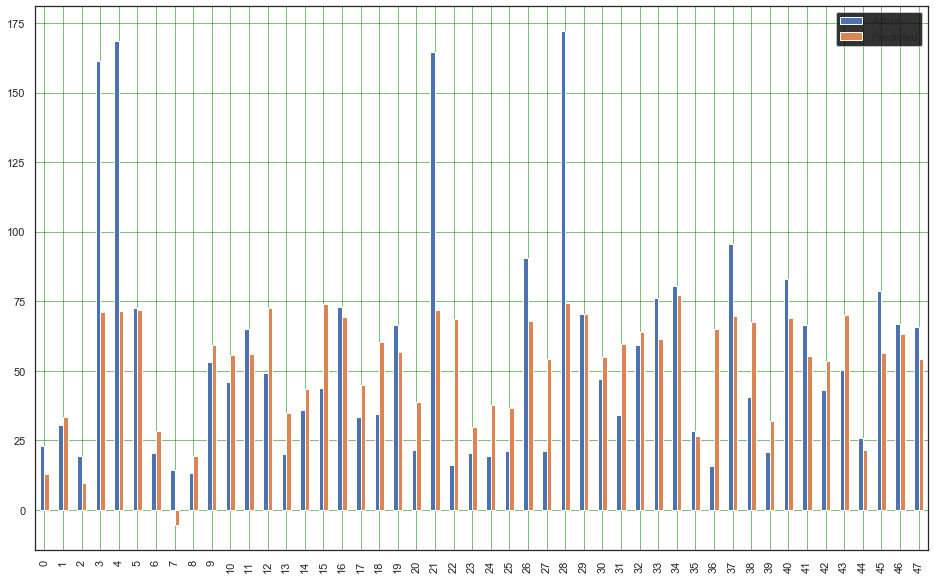

In [37]:
df2 = df_line.head(48)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


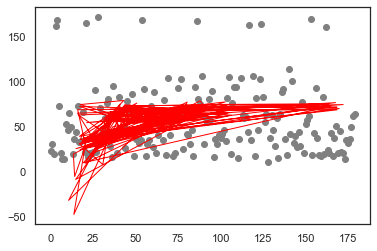

In [39]:

plt.scatter(range(len(y_test)), y_test,  color='gray')
plt.plot(y_test, y_pred_line, color='red', linewidth=1)
plt.show()


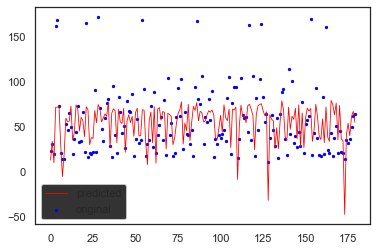

In [40]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
# plt.plot(x_ax, y_pred_line, color='red', linewidth=2)
plt.plot(x_ax, y_pred_line, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 


### 2. Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor # Our DEcision Tree classifier
Classifier_tree = DecisionTreeRegressor(max_depth = 5)
Classifier_tree.fit(X_train,y_train)
y_pred_tree = Classifier_tree.predict(X_test)
df_tree = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_tree.flatten()})
print(df_tree.head())


mse = mean_squared_error(y_test, y_pred_tree)
print('\n',"MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))

tree_score=Classifier_tree.score(X_test, y_test)
print('\n'," Model score (R-squared): %.2f" % tree_score)

   Actual   Predicted
0   23.02   21.746825
1   30.67   35.940690
2   19.27   21.746825
3  161.54  152.354167
4  168.50  152.354167

 MSE: 281.17
RMSE: 16.77

  Model score (R-squared): 0.80


In [44]:
from sklearn.model_selection import cross_val_score
scores_tree = cross_val_score(Classifier_tree, X, y, cv=10) # Ten-fold cross validation.
print(scores_tree)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores_tree.mean(), scores_tree.std() * 2))

[ 0.17024242  0.4900693   0.42945295  0.83109637  0.22873655  0.58693147
  0.81845906 -0.00692337  0.90717347  0.59557709]
Accuracy: 0.51 (+/- 0.58)


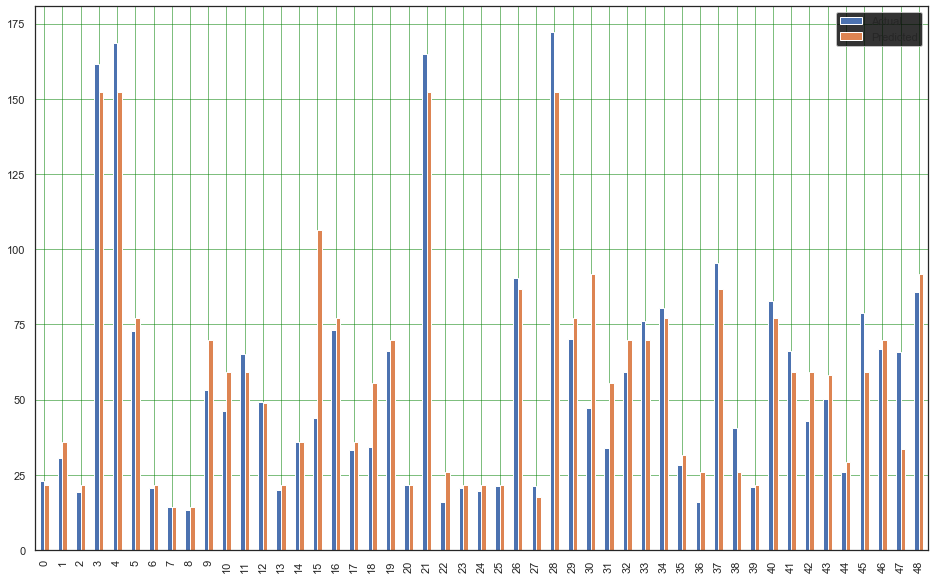

In [45]:
df2 = df_tree.head(49)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


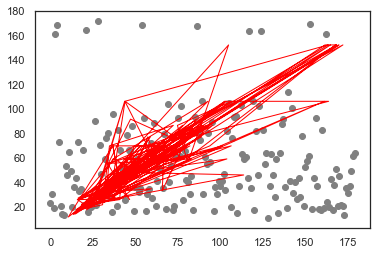

In [46]:
plt.scatter(range(len(y_test)), y_test,  color='gray')
plt.plot(y_test, y_pred_tree, color='red', linewidth=1)
plt.show()

### Max depth = 4

In [61]:
from sklearn.tree import DecisionTreeRegressor # Our DEcision Tree classifier
Classifier = DecisionTreeRegressor(max_depth=4)
Classifier.fit(X_train,y_train)
y_pred_tree1 = Classifier.predict(X_test)
df_tree1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_tree1.flatten()})
print(df_tree1.head())



mse = mean_squared_error(y_test, y_pred_tree1)
print('\n',"MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))

tree_score=Classifier.score(X_test, y_test)
print('\n'," Model score (R-squared): %.2f" % tree_score)

   Actual   Predicted
0   23.02   23.201410
1   30.67   34.101569
2   19.27   23.201410
3  161.54  123.560937
4  168.50  123.560937

 MSE: 371.19
RMSE: 19.27

  Model score (R-squared): 0.73


### Max depth = 5

In [60]:

from sklearn.tree import DecisionTreeRegressor # Our DEcision Tree classifier
Classifier = DecisionTreeRegressor(max_depth=5)
Classifier.fit(X_train,y_train)
y_pred_tree1 = Classifier.predict(X_test)
df_tree1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_tree1.flatten()})
print(df_tree1.head())



mse = mean_squared_error(y_test, y_pred_tree1)
print('\n',"MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))

tree_score=Classifier.score(X_test, y_test)
print('\n'," Model score (R-squared): %.2f" % tree_score)

   Actual   Predicted
0   23.02   21.746825
1   30.67   35.940690
2   19.27   21.746825
3  161.54  152.354167
4  168.50  152.354167

 MSE: 281.17
RMSE: 16.77

  Model score (R-squared): 0.80


### Max depth = 6

In [58]:
from sklearn.tree import DecisionTreeRegressor # Our DEcision Tree classifier
Classifier = DecisionTreeRegressor(max_depth=6)
Classifier.fit(X_train,y_train)
y_pred_tree1 = Classifier.predict(X_test)
df_tree1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_tree1.flatten()})
print(df_tree1.head())



mse = mean_squared_error(y_test, y_pred_tree1)
print('\n',"MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))

tree_score=Classifier.score(X_test, y_test)
print('\n'," Model score (R-squared): %.2f" % tree_score)

   Actual   Predicted
0   23.02   20.953333
1   30.67   35.468750
2   19.27   20.953333
3  161.54  157.644545
4  168.50  157.644545

 MSE: 290.14
RMSE: 17.03

  Model score (R-squared): 0.79


## 3. BayesianRidge()


In [47]:
bay_ridge = BayesianRidge()
# print(bay_ridge)
bay_ridge.fit(X_train, y_train)
y_pred_bay = bay_ridge.predict(X_test)
df_bay = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_bay.flatten()})
print(df_bay.head())
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred_bay)),2)))
rms
mse = mean_squared_error(y_test, y_pred_bay)
print('\n',"MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))

score=bay_ridge.score(X_train, y_train)
print('\n',"Model score (R-squared): %.2f" % score)



   Actual  Predicted
0   23.02  18.313940
1   30.67  54.530264
2   19.27  23.944279
3  161.54  61.929300
4  168.50  62.011895

 MSE: 1037.61
RMSE: 32.21

 Model score (R-squared): 0.30


In [48]:
scores_bay = cross_val_score(bay_ridge, X, y, cv=10) # Ten-fold cross validation.
print(scores_bay)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores_bay.mean(), scores_bay.std() * 2))

[-0.07412834  0.16854583  0.40333812  0.17663513 -0.63737259  0.44032539
  0.26543742  0.37365442  0.40047985  0.07342179]
Accuracy: 0.16 (+/- 0.62)


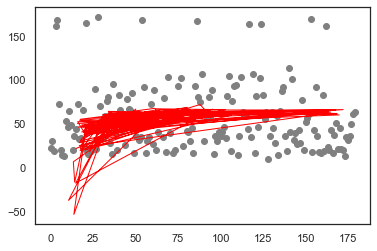

In [49]:
plt.scatter(range(len(y_test)), y_test,  color='gray')
plt.plot(y_test, y_pred_bay, color='red', linewidth=1)
plt.show()

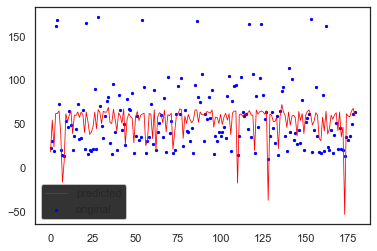

In [50]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_bay, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 


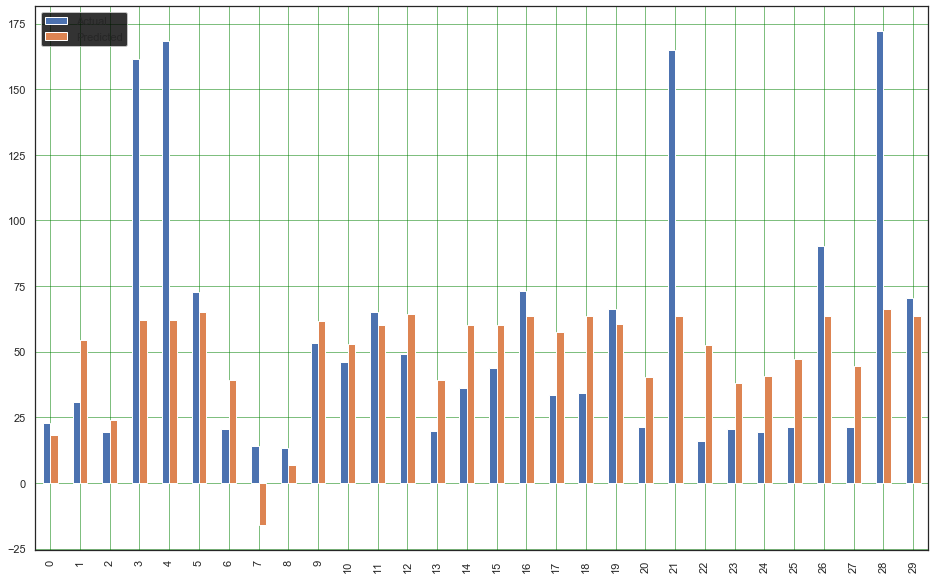

In [51]:
df2 = df_bay.head(30)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


### 4. SVR Regressor

In [52]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

df_svr = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_svr.flatten()})
print(df_svr.head())

mse_svr = mean_squared_error(y_test, y_pred_svr)
print('\n',"MSE: %.2f" % mse_svr)
print("RMSE: %.2f" % sqrt(mse_svr))

score=svr.score(X_train, y_train)
print('\n',"Model score (R-squared): %.2f" % score)



   Actual  Predicted
0   23.02  21.059149
1   30.67  49.283780
2   19.27  21.834218
3  161.54  59.444088
4  168.50  59.347550

 MSE: 977.15
RMSE: 31.26

 Model score (R-squared): 0.35


In [53]:
scores_svr = cross_val_score(svr, X, y, cv=10) # Ten-fold cross validation.
print(scores_svr)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores_svr.mean(), scores_svr.std() * 2))

[0.54719264 0.18382151 0.37814774 0.70502179 0.1674784  0.42300969
 0.22628088 0.38115724 0.61309206 0.0300182 ]
Accuracy: 0.37 (+/- 0.41)


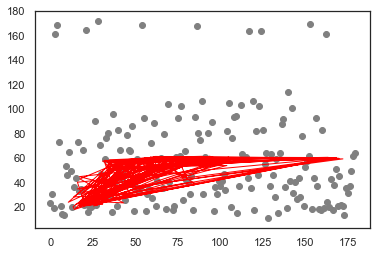

In [54]:
plt.scatter(range(len(y_test)), y_test,  color='gray')
plt.plot(y_test, y_pred_svr, color='red', linewidth=1)
plt.show()

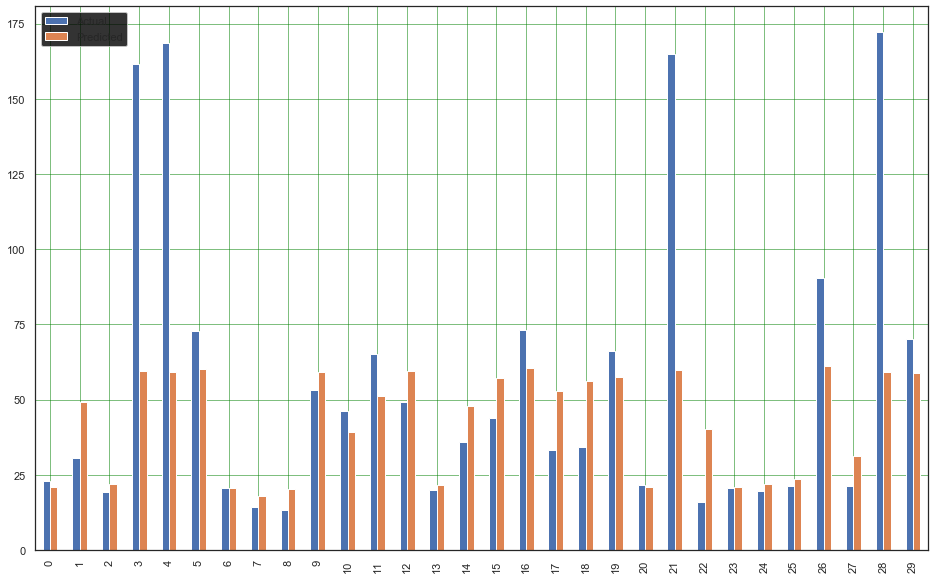

In [55]:
df2 = df_svr.head(30)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


   Actual   Predicted
0   23.02   20.953333
1   30.67   35.468750
2   19.27   20.953333
3  161.54  157.644545
4  168.50  157.644545

 MSE: 300.96
RMSE: 17.35

  Model score (R-squared): 0.78


In [ ]:
# plt.scatter(range(len(y_test)), y_test,  color='gray')
# plt.plot(y_test, y_pred_bay, color='red', linewidth=1)
# plt.show()

In [66]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(Classifier, X, y, cv=10) # Ten-fold cross validation.
# print(scores)
# print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

[ 0.15743233  0.57674397  0.24720873  0.83298835  0.21641248  0.53609172
  0.79766647 -0.00223378  0.91188937  0.51416882]
Accuracy: 0.48 (+/- 0.60)


### 5. Gradient Boost Regressor

In [62]:
gbrt=GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(X_train, y_train) 
y_pred_gbrt=gbrt.predict(X_test) 

df_gbrt = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_gbrt.flatten()})
print(df_gbrt.head())



mse = mean_squared_error(y_test, y_pred_gbrt)
print('\n',"MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))

score_boost=gbrt.score(X_test, y_test)
print('\n'," Model score (R-squared): %.2f" % score_boost)

   Actual   Predicted
0   23.02   23.903055
1   30.67   35.288576
2   19.27   23.277406
3  161.54  142.313656
4  168.50  137.588799

 MSE: 243.16
RMSE: 15.59

  Model score (R-squared): 0.82


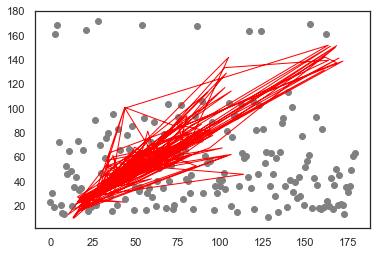

In [63]:
plt.scatter(range(len(y_test)), y_test,  color='gray')
plt.plot(y_test, y_pred_gbrt, color='red', linewidth=1)
plt.show()

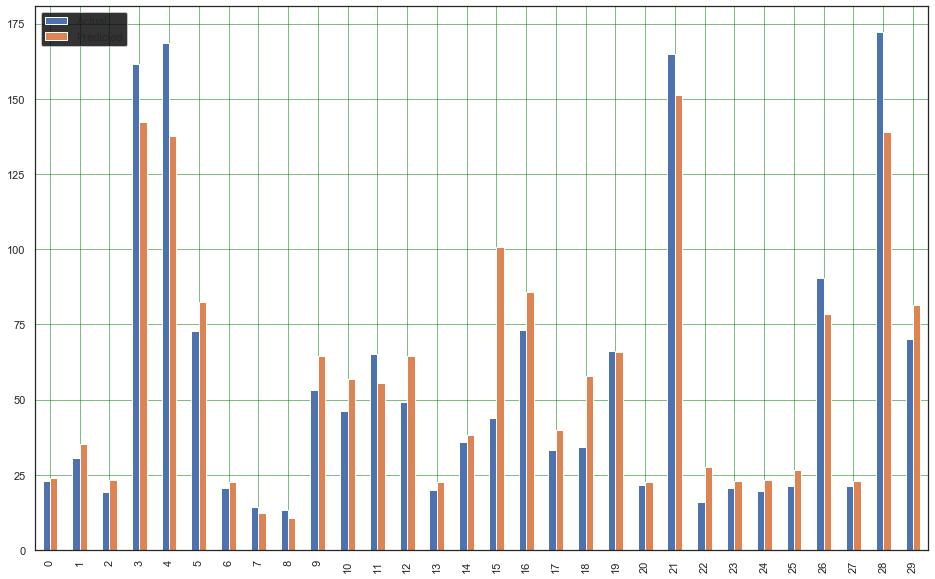

In [64]:
df2 = df_gbrt.head(30)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [65]:
from sklearn.model_selection import cross_val_score
scores_boost = cross_val_score(gbrt, X, y, cv=10) # Ten-fold cross validation.
print(scores_boost)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores_boost.mean(), scores_boost.std() * 2))

[0.19793525 0.60952911 0.66874813 0.78840744 0.39407568 0.65001607
 0.85134882 0.32745042 0.91654101 0.66235531]
Accuracy: 0.61 (+/- 0.44)


### Statistical T-test

In [66]:


CrossValidationScores = pd.DataFrame()
CrossValidationScores['Linear'] = scores_line
CrossValidationScores['Decision Tree'] = scores_tree
CrossValidationScores['Bayesian'] = scores_bay
CrossValidationScores['SVR'] = scores_svr
CrossValidationScores['Gradient Boost'] = scores_boost

In [67]:
CrossValidationScores

,Linear,Decision Tree,Bayesian,SVR,Gradient Boost
0,-0.085764,0.170242,-0.074128,0.547193,0.197935
1,0.269049,0.490069,0.168546,0.183822,0.609529
2,0.564172,0.429453,0.403338,0.378148,0.668748
3,0.744766,0.831096,0.176635,0.705022,0.788407
4,-0.690132,0.228737,-0.637373,0.167478,0.394076
5,0.558921,0.586931,0.440325,0.423010,0.650016
6,0.270894,0.818459,0.265437,0.226281,0.851349
7,0.418788,-0.006923,0.373654,0.381157,0.327450
8,0.708963,0.907173,0.400480,0.613092,0.916541
9,0.618183,0.595577,0.073422,0.030018,0.662355


In [101]:
boost = CrossValidationScores['Gradient Boost']
rf = CrossValidationScores['Random Forest']
line  = CrossValidationScores['Gradient Boost']

import scipy.stats

In [105]:
alpha = 0.05
# if p > alpha - > then there's no significance difference between two models
# if p < alpha -> then there is  significance difference between two models


print("For Random Forest &  Gradient Boost")
t,p = scipy.stats.ttest_ind(boost,rf)
print("t = ",t, "p = ",p)
if p > alpha:
    print("Then there's no significance difference between two models")
    print('\n')
else:
    print("Then there is significance difference between two models")
    print('\n')


     

For Random Forest &  Gradient Boost
t =  0.806205985166172 p =  0.43064730506741056
Then there's no significance difference between two models


